# Modeling Survey data

This document records modeling step. 

In [30]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
survey = survey('data/survey')

In [32]:
survey.processor()

In [33]:
df = survey.data

In [34]:
dum = survey.survey_cols[1:]

In [36]:
dumdf = df[dum]

In [41]:
n_df = df[[c for c in df.columns if c not in dum]]

In [42]:
dumdf = pd.get_dummies(dumdf)

,age,realinc
0,21,10505.0000
3,30,99956.0000
4,41,99956.0000
5,25,42020.0000
6,29,0.0000
8,34,99956.0000
10,33,51570.0000
11,38,0.0000
13,26,4966.0000
14,36,4202.0000


In [43]:
new_df = pd.concat([n_df, dumdf], axis = 1)

In [48]:
y = new_df.pop('employed').values

In [49]:
X = new_df.values

In [50]:
from sklearn.cross_validation import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
pred = rf.predict(X_test)

In [57]:
rf.score(X_test,y_test)

0.84615384615384615

In [69]:
f = rf.feature_importances_.argsort()[::-1][:10]

In [76]:
new_df.columns[f]

Index([  u'richwork_Not applicable',                   u'realinc',
       u'richwork_Continue working',     u'richwork_Stop working',
                             u'age',                  u'agekdbrn',
                          u'sphrs1',                    u'maeduc',
                          u'paeduc',                    u'speduc'],
      dtype='object')

In [77]:
rf.apply(X_test)

array([[ 394, 1166, 1277, ...,  768,  249,  826],
       [ 175, 1139, 1025, ..., 1178, 1144,   57],
       [ 114,  363,  185, ...,  433,  156,  379],
       ..., 
       [  39,  597,   29, ...,  486,  297,  341],
       [ 663, 1119,  917, ..., 1196,  700,   63],
       [ 954, 1252,  895, ...,  934,  994,   57]])

In [78]:
from sklearn.metrics import roc_auc_score

In [82]:
roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])

0.88600453382793276

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gd = GradientBoostingClassifier()

In [86]:
gd.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [87]:
roc_auc_score(y_test,gd.predict_proba(X_test)[:,1])

0.89181122789152767

In [114]:
gd.score(X_test, y_test)

0.84023668639053251

In [101]:
check = pd.concat([new_df.ix[:,gd.feature_importances_.argsort()[::-1][:20]],df.employed],axis=1)

In [104]:
new_df.columns[gd.feature_importances_.argsort()[::-1][:20]]

Index([u'richwork_Not applicable',                     u'age',
                       u'realinc',   u'colath_Not applicable',
         u'colcom_Not applicable',                u'agekdbrn',
                        u'sphrs1',  u'spkhomo_Not applicable',
                        u'paeduc', u'getahead_Not applicable',
                        u'maeduc',                  u'speduc',
          u'class__Working class',        u'satjob_No answer',
             u'satjob_Don't know',        u'conbus_No answer',
             u'conbus_Hardly any',      u'natfare_Too little',
        u'incom16_Not applicable',   u'degree_Lt high school'],
      dtype='object')

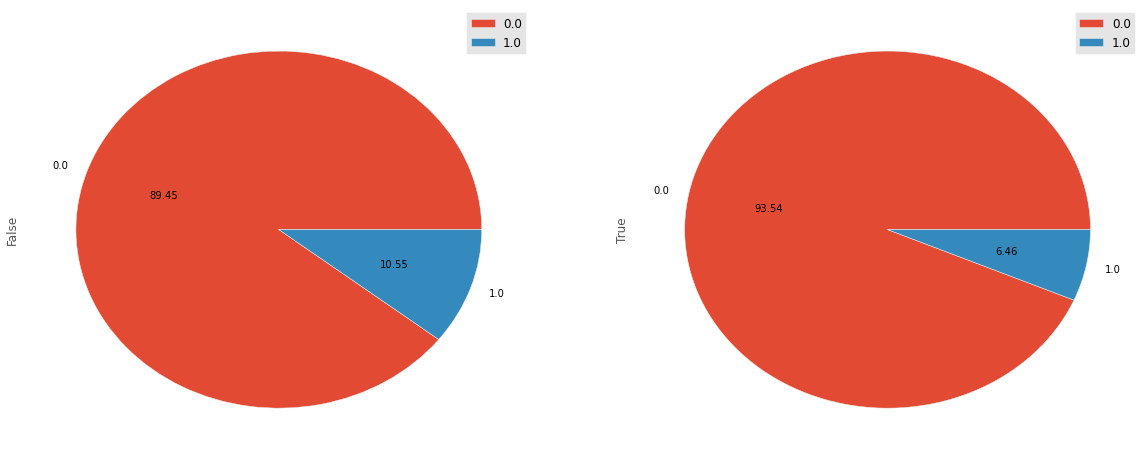

In [113]:
pie_chart(check.employed,check['conbus_Hardly any'])

In [109]:
check.groupby('employed')['age']